In [10]:
import mne
import numpy as np
import matplotlib

#### Loading cleaned data as MNE object

In [3]:
# import data saved from data_cleaning_MU.ipynb
file_path = './cleaned_data/data.npy'

data = np.load(file_path)

In [4]:
data.shape

(40983, 4, 460)

In [5]:
# adding custom data as MNE object
n_channels = 4
sfreq = 256  # assuming sampling freq for MUSE headset is 256
ch_names = ['TP9', 'FP1', 'FP2', 'TP10']
ch_types = ['eeg', 'eeg', 'eeg', 'eeg']  # All eeg channels

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

In [6]:
# data is in shape (n_epochs, n_channels, n_times) (here, n_times is same as median len)
# note that the total irl time for the measured eeg is n_times/sfreq

epochs_array = mne.EpochsArray(data=data, info=info)

Not setting metadata
40983 matching events found
No baseline correction applied
0 projection items activated


#### Visualisations using MNE

In [7]:
print(epochs_array)

<EpochsArray | 40983 events (all good), 0 – 1.793 s (baseline off), ~575.3 MiB, data loaded,
 '1': 40983>


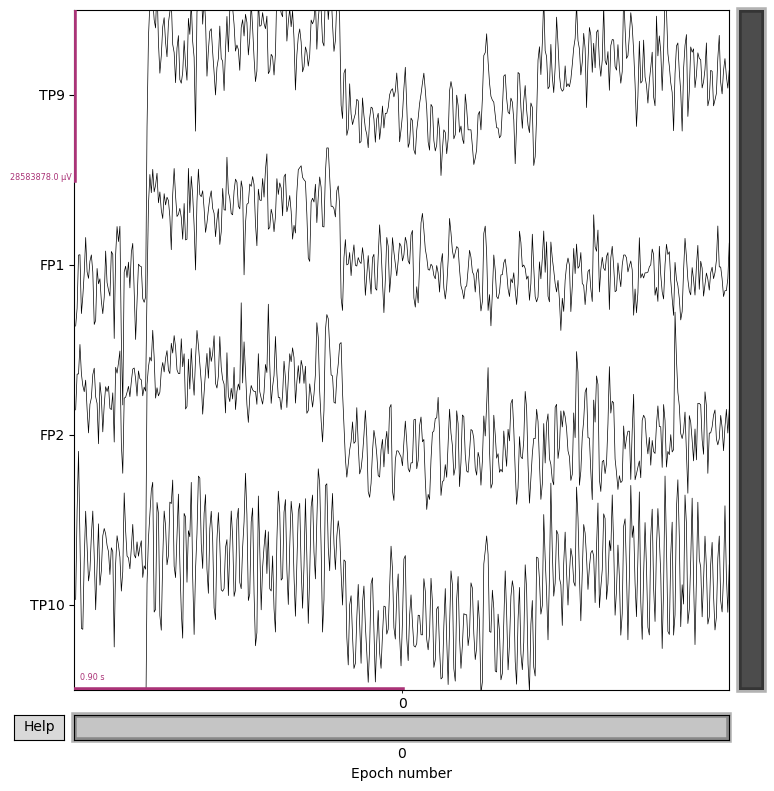

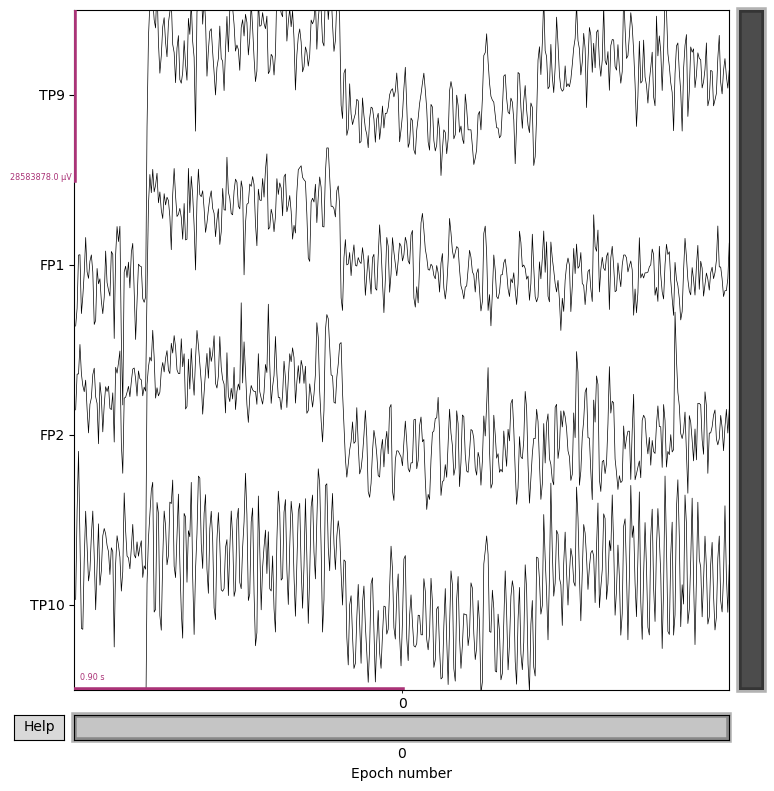

In [18]:
# plotting for one epoch
%matplotlib inline
epochs_array[0].plot(n_epochs=1, n_channels=4, scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


c:\Users\joelj\anaconda3\envs\BCS\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


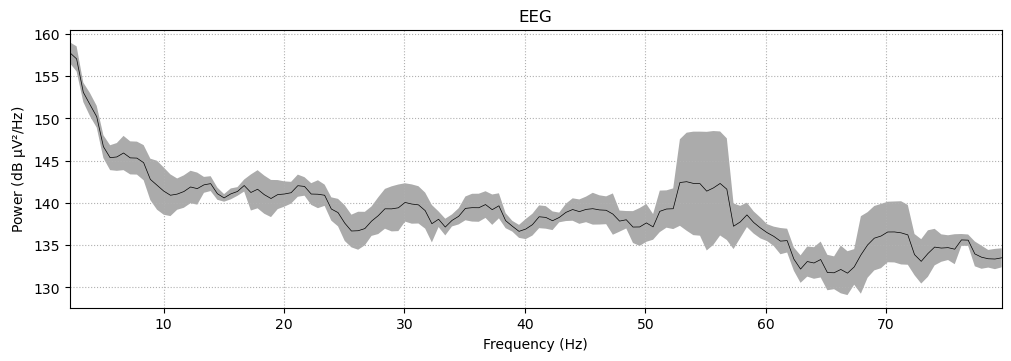

In [ ]:
# plot PSD
# WHY IS THE PSD LIKE THIS?!
epochs_array[0].plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False);